# Imports and a function

In [ ]:
def plot(X,y=None):# plot
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Create data


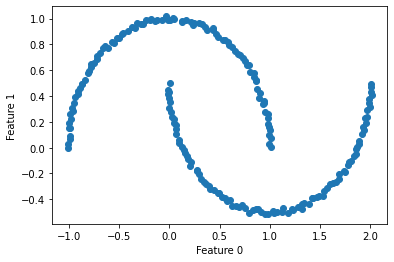

In [ ]:
# generate some random moon data
X, y = make_moons(n_samples=200,noise=0.01,shuffle=True,random_state=150)
plot(X)

# Add noise

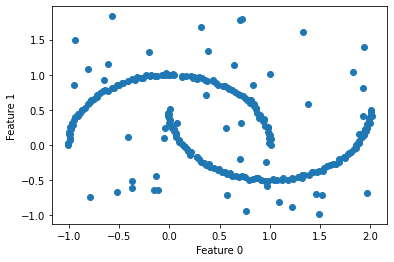

In [ ]:
outliers = np.random.RandomState(0).rand(50, 2) * 3 -1
X = np.concatenate([X, outliers])
y = np.concatenate([y, [-1]*len(outliers)])
plot(X)

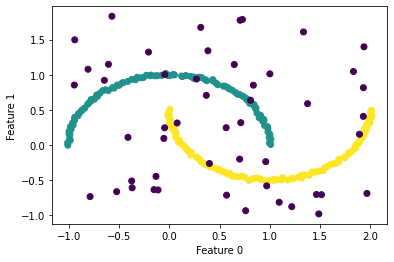

In [ ]:
plot(X,y)

# Kmeans

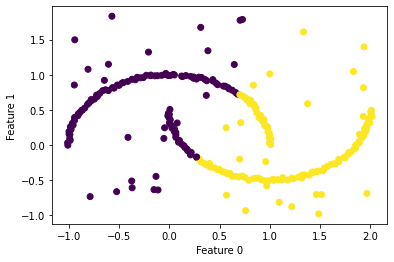

In [ ]:
# cluster the data
num_clusters = 2 
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit()
kmeans_clusters = kmeans.predict()
# plot the cluster assignments and cluster centers
plot(X,kmeans_clusters)

# Go back to slides!

# DBSCAN

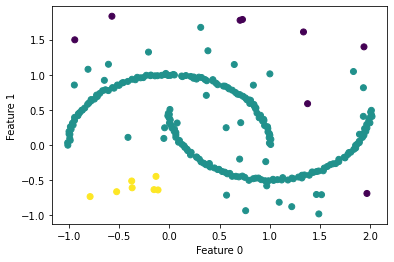

In [ ]:
MIN_PTS=5 #Algo deafult
eps=0.4 #Algo deafult
from sklearn.cluster import DBSCAN
# cluster the data 
dbscan = DBSCAN(eps=eps, min_samples = MIN_PTS)
dbscan_clusters = dbscan.fit_predict(X)
# plot the cluster assignments

plot(X,dbscan_clusters)

In [ ]:
print('preds:')
dbscan.labels_

preds:


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0

In [ ]:
print('num of classified noise instances:',len([x for x in dbscan.labels_ if x==-1]))
print('num of classified regular instances:',len([x for x in dbscan.labels_ if x!=-1]))
print('Estimated number of clusters: %d' % len(set(dbscan.labels_)- set([-1])))

num of classified noise instances: 8
num of classified regular instances: 242
Estimated number of clusters: 2


# Lets try the elbow method (k-distance):

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=MIN_PTS)
nbrs = neigh.fit(X)
distances, _ = nbrs.kneighbors(X)
distances #What is on the x\y axis?

array([[0.        , 0.02229829, 0.02664039, 0.06094817, 0.06330045],
       [0.        , 0.04154225, 0.04214383, 0.06330045, 0.08406018],
       [0.        , 0.03145217, 0.04827004, 0.05746425, 0.08653097],
       ...,
       [0.        , 0.19001853, 0.19444327, 0.25034796, 0.28758432],
       [0.        , 0.29169122, 0.35441564, 0.4115161 , 0.43421158],
       [0.        , 0.2755363 , 0.27824063, 0.28824342, 0.42770353]])

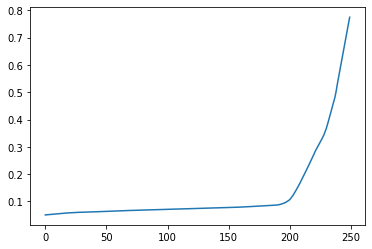

In [ ]:
distances = distances[:,-1]
distances = np.sort(distances, axis=0)
from scipy.signal import savgol_filter #Can help us to smooth the plot
distances = savgol_filter(distances, 21, 1) # Smooth the data
plt.plot(distances)


# OPTICS

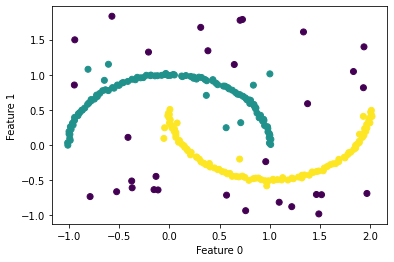

num of classified noise instances: 31
num of classified regular instances: 219
Estimated number of clusters: 2


In [ ]:
from sklearn.cluster import OPTICS
clustering_optics = OPTICS(min_samples=MIN_PTS,min_cluster_size=70).fit(X)
optics_clusters = clustering_optics.labels_
plot(X,optics_clusters)
print('num of classified noise instances:',len([x for x in optics_clusters if x==-1]))
print('num of classified regular instances:',len([x for x in optics_clusters if x!=-1]))
print('Estimated number of clusters: %d' % len(set(optics_clusters) - set([-1])))

# Go back to slides

Aglomerative clusering

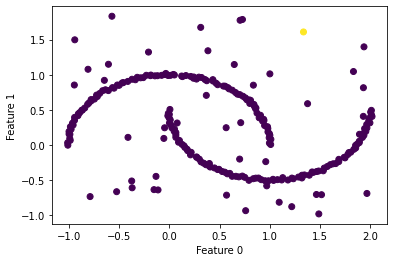

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ag_cluster = AgglomerativeClustering(n_clusters=num_clusters,linkage='single')
ag_clusters = ag_cluster.fit_predict(X)
plot(X,ag_clusters)#Why does it looks so bad?!


# Back to slides

# Evaluation
What happens when you use the wrong evaluation metric: silhouette, dbscan, and OPTICS.

In [ ]:

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print('K means silhouette_score %0.3f' % (silhouette_score(X,kmeans_clusters)))
print('DBSCAN silhouette_score %0.3f' % (silhouette_score(X,dbscan_clusters)))
print('OPTICS silhouette_score %0.3f' % (silhouette_score(X,optics_clusters)))

print("K means ARI = %0.3f" % (adjusted_rand_score(y, kmeans_clusters)))
print("DBSCAN ARI = %0.3f" % (adjusted_rand_score(y, dbscan_clusters)))
print("OPTICS ARI = %0.3f" % (adjusted_rand_score(y, optics_clusters)))



K means silhouette_score 0.449
DBSCAN silhouette_score 0.077
OPTICS silhouette_score 0.222
K means ARI = 0.149
DBSCAN ARI = 0.074
OPTICS ARI = 0.824
